In [1]:
# Libraries
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from scipy import stats
from pandas import Series, DataFrame
from pandas.plotting import autocorrelation_plot
from pylab import rcParams
from matplotlib import collections as collections
from matplotlib.patches import Rectangle
from itertools import cycle
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
import datetime

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')
from numpy import median
from numpy import mean

In [2]:
train = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
train.shape

(48204, 9)

In [4]:
train.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918

In [5]:
train.describe()

temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  48204.000000  48204.000000  48204.000000  48204.000000    48204.000000
mean     281.205870      0.334264      0.000222     49.362231     3259.818355
std       13.338232     44.789133      0.008168     39.015750     1986.860670
min        0.000000      0.000000      0.000000      0.000000        0.000000
25%      272.160000      0.000000      0.000000      1.000000     1193.000000
50%      282.450000      0.000000      0.000000     64.000000     3380.000000
75%      291.806000      0.000000      0.000000     90.000000     4933.000000
max      310.070000   9831.300000      0.510000    100.000000     7280.000000

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
holiday                48204 non-null object
temp                   48204 non-null float64
rain_1h                48204 non-null float64
snow_1h                48204 non-null float64
clouds_all             48204 non-null int64
weather_main           48204 non-null object
weather_description    48204 non-null object
date_time              48204 non-null object
traffic_volume         48204 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [7]:
train['holiday'].value_counts()

None                         48143
Labor Day                        7
Martin Luther King Jr Day        6
New Years Day                    6
Christmas Day                    6
Thanksgiving Day                 6
Washingtons Birthday             5
Memorial Day                     5
State Fair                       5
Columbus Day                     5
Independence Day                 5
Veterans Day                     5
Name: holiday, dtype: int64

In [8]:
train['weather_main'].value_counts()

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

In [9]:
train['weather_description'].value_counts()

sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto

In [10]:
train['Fecha'] = pd.to_datetime(train.date_time)

In [11]:
train['year'] = pd.DatetimeIndex(train['Fecha']).year
train['month'] = pd.DatetimeIndex(train['Fecha']).month
train['day'] = pd.DatetimeIndex(train['Fecha']).day
train['hour'] = pd.DatetimeIndex(train['Fecha']).hour

In [12]:
train = train.drop(['Fecha', 'date_time'], axis=1)

In [13]:
train.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description  traffic_volume  year  month  day  hour  
0    scattered clouds            5545  2012     10    2     9  
1       broken clouds            4516  2012     10    2    10  
2     overcast clouds            4767  2012     10    2    11  
3     overcast clouds            5026  2012     10    2    12  
4       broken clouds            4918  2012     10    2    13

### Remove duplicate rows

In [14]:
train.drop_duplicates(subset=None, inplace=True)

In [15]:
train_num = train.select_dtypes(include=[np.number])

In [16]:
columnas = ['year', 'month', 'day', 'hour']
train_num = train_num.drop(columnas, axis=1)

In [17]:
train_num.head()

temp  rain_1h  snow_1h  clouds_all  traffic_volume
0  288.28      0.0      0.0          40            5545
1  289.36      0.0      0.0          75            4516
2  289.58      0.0      0.0          90            4767
3  290.13      0.0      0.0          90            5026
4  291.14      0.0      0.0          75            4918

In [18]:
Corr = train_num.corr(method='pearson')
Corr

temp   rain_1h   snow_1h  clouds_all  traffic_volume
temp            1.000000  0.009070 -0.019756   -0.101968        0.130161
rain_1h         0.009070  1.000000 -0.000090    0.004818        0.004715
snow_1h        -0.019756 -0.000090  1.000000    0.027934        0.000736
clouds_all     -0.101968  0.004818  0.027934    1.000000        0.067138
traffic_volume  0.130161  0.004715  0.000736    0.067138        1.000000

In [19]:
corr = train_num.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

In [20]:
train.isna().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
traffic_volume         0
year                   0
month                  0
day                    0
hour                   0
dtype: int64

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48187 entries, 0 to 48203
Data columns (total 12 columns):
holiday                48187 non-null object
temp                   48187 non-null float64
rain_1h                48187 non-null float64
snow_1h                48187 non-null float64
clouds_all             48187 non-null int64
weather_main           48187 non-null object
weather_description    48187 non-null object
traffic_volume         48187 non-null int64
year                   48187 non-null int64
month                  48187 non-null int64
day                    48187 non-null int64
hour                   48187 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 4.8+ MB


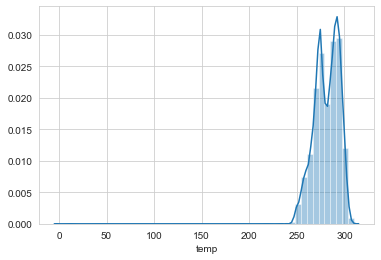

In [22]:
sb.distplot(train['temp'])

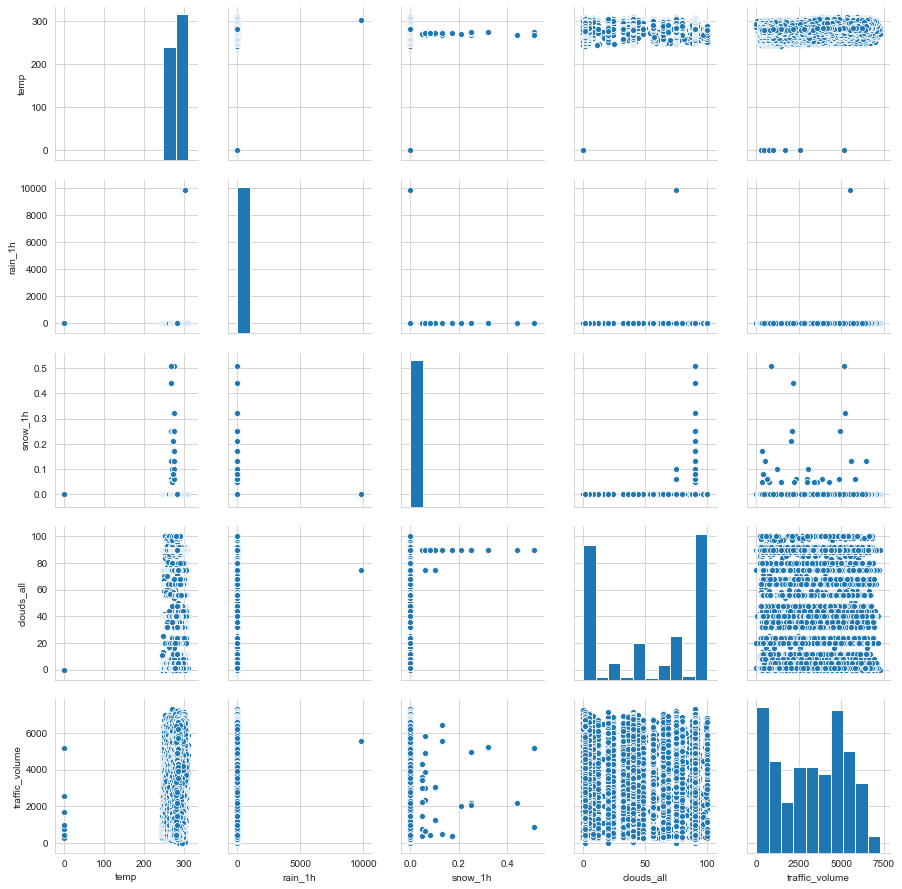

In [23]:
sb.pairplot(train_num)

In [24]:
train['holiday'].value_counts()

None                         48126
Labor Day                        7
Martin Luther King Jr Day        6
New Years Day                    6
Christmas Day                    6
Thanksgiving Day                 6
Washingtons Birthday             5
Memorial Day                     5
State Fair                       5
Columbus Day                     5
Independence Day                 5
Veterans Day                     5
Name: holiday, dtype: int64

In [25]:
train.shape

(48187, 12)

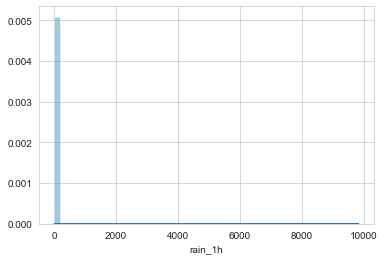

In [26]:
sb.distplot(train['rain_1h'])

In [27]:
train.rain_1h.value_counts()

0.00     44720
0.25       948
0.51       256
1.02       123
0.30       121
         ...  
5.11         1
3.01         1
2.73         1
18.03        1
2.11         1
Name: rain_1h, Length: 372, dtype: int64

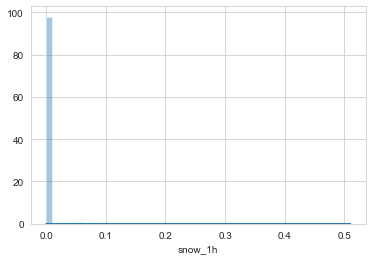

In [28]:
sb.distplot(train['snow_1h'])

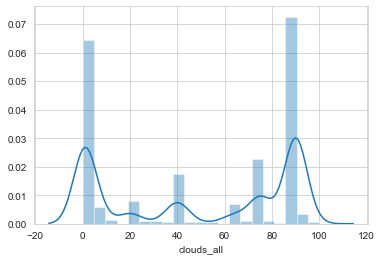

In [29]:
sb.distplot(train['clouds_all'])

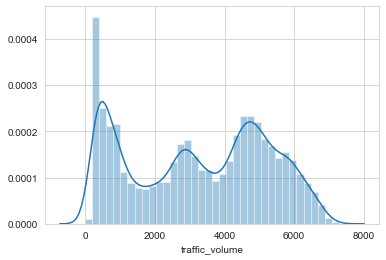

In [30]:
sb.distplot(train['traffic_volume'])

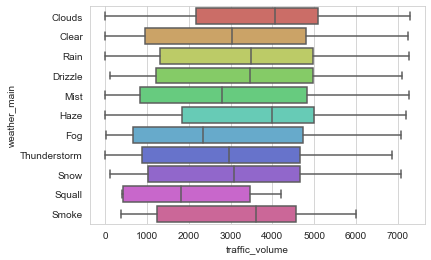

In [31]:
sb.boxplot(x='traffic_volume', y='weather_main', data=train, palette='hls')

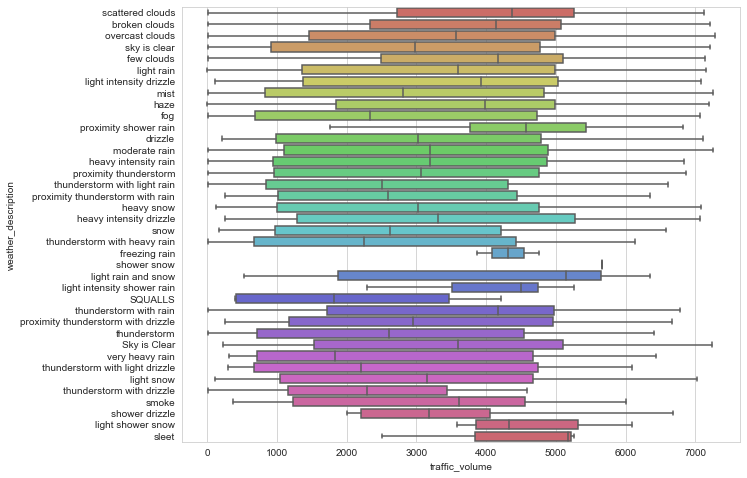

In [32]:
plt.figure(figsize=(10,8))
sb.boxplot(x='traffic_volume', y='weather_description', data=train, palette='hls')

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48187 entries, 0 to 48203
Data columns (total 12 columns):
holiday                48187 non-null object
temp                   48187 non-null float64
rain_1h                48187 non-null float64
snow_1h                48187 non-null float64
clouds_all             48187 non-null int64
weather_main           48187 non-null object
weather_description    48187 non-null object
traffic_volume         48187 non-null int64
year                   48187 non-null int64
month                  48187 non-null int64
day                    48187 non-null int64
hour                   48187 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 6.0+ MB


In [34]:
train['year'].value_counts(sort=True, ascending=True)

2012     2559
2015     4372
2014     4839
2018     7948
2013     8573
2016     9300
2017    10596
Name: year, dtype: int64

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48187 entries, 0 to 48203
Data columns (total 12 columns):
holiday                48187 non-null object
temp                   48187 non-null float64
rain_1h                48187 non-null float64
snow_1h                48187 non-null float64
clouds_all             48187 non-null int64
weather_main           48187 non-null object
weather_description    48187 non-null object
traffic_volume         48187 non-null int64
year                   48187 non-null int64
month                  48187 non-null int64
day                    48187 non-null int64
hour                   48187 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 6.0+ MB


In [36]:
train.groupby(['weather_main']).size()

weather_main
Clear           13384
Clouds          15158
Drizzle          1820
Fog               912
Haze             1360
Mist             5949
Rain             5672
Smoke              20
Snow             2875
Squall              4
Thunderstorm     1033
dtype: int64

In [37]:
train[train['weather_main'] == 'Fog'][['temp', 'year']]

temp  year
296    281.95  2012
298    281.61  2012
299    281.57  2012
300    281.42  2012
302    281.29  2012
...       ...   ...
47840  288.31  2018
47843  288.17  2018
47847  288.07  2018
47913  290.77  2018
47927  290.90  2018

[912 rows x 2 columns]

In [38]:
train[train['weather_main'] == 'Fog'][['temp', 'year']].sort_values(by='year')

temp  year
296    281.95  2012
1669   271.33  2012
1671   271.94  2012
1674   273.36  2012
1676   274.34  2012
...       ...   ...
42897  272.29  2018
42905  271.15  2018
42908  270.50  2018
43301  268.79  2018
47927  290.90  2018

[912 rows x 2 columns]

In [39]:
train[train['weather_main'] == 'Fog'][['year']].isin(['2018', '2015'])

year
296    False
298    False
299    False
300    False
302    False
...      ...
47840   True
47843   True
47847   True
47913   True
47927   True

[912 rows x 1 columns]

In [40]:
train.groupby(['weather_main']).size()

weather_main
Clear           13384
Clouds          15158
Drizzle          1820
Fog               912
Haze             1360
Mist             5949
Rain             5672
Smoke              20
Snow             2875
Squall              4
Thunderstorm     1033
dtype: int64

In [41]:
train.groupby(['weather_main']).agg({'traffic_volume': [np.mean, np.size]})

traffic_volume       
                       mean   size
weather_main                      
Clear           3055.614465  13384
Clouds          3617.989115  15158
Drizzle         3292.189560   1820
Fog             2703.720395    912
Haze            3502.101471   1360
Mist            2933.343923   5949
Rain            3317.905501   5672
Smoke           3237.650000     20
Snow            3016.321391   2875
Squall          2061.750000      4
Thunderstorm    2999.431752   1033

In [42]:
train.groupby(['weather_main']).size().to_frame('size')

size
weather_main       
Clear         13384
Clouds        15158
Drizzle        1820
Fog             912
Haze           1360
Mist           5949
Rain           5672
Smoke            20
Snow           2875
Squall            4
Thunderstorm   1033

In [43]:
train.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description  traffic_volume  year  month  day  hour  
0    scattered clouds            5545  2012     10    2     9  
1       broken clouds            4516  2012     10    2    10  
2     overcast clouds            4767  2012     10    2    11  
3     overcast clouds            5026  2012     10    2    12  
4       broken clouds            4918  2012     10    2    13

In [44]:
train['snow_1h'].value_counts()

0.00    48124
0.05       14
0.06       12
0.10        6
0.13        6
0.51        6
0.25        6
0.32        5
0.17        3
0.08        2
0.44        2
0.21        1
Name: snow_1h, dtype: int64

In [45]:
pd.crosstab(index = train["rain_1h"], columns="snow_1h")

col_0    snow_1h
rain_1h         
0.00       44720
0.25         948
0.26           2
0.27           5
0.28          23
...          ...
28.70          2
31.75          1
44.45          1
55.63          1
9831.30        1

[372 rows x 1 columns]

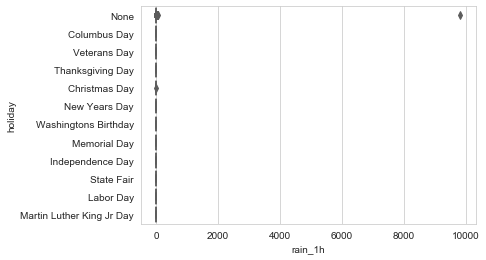

In [46]:
sb.boxplot(x='rain_1h', y='holiday', data=train, palette='hls')

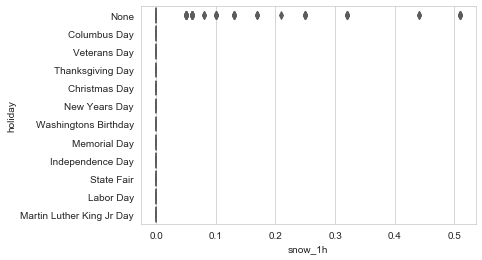

In [47]:
sb.boxplot(x='snow_1h', y='holiday', data=train, palette='hls')

In [48]:
train.groupby([(train['temp'] == 0)]).size()

temp
False    48177
True        10
dtype: int64

In [49]:
np.log(train['temp']+1)

0        5.667395
1        5.671122
2        5.671879
3        5.673770
4        5.677233
           ...   
48199    5.650557
48200    5.648129
48201    5.648023
48202    5.645765
48203    5.645871
Name: temp, Length: 48187, dtype: float64

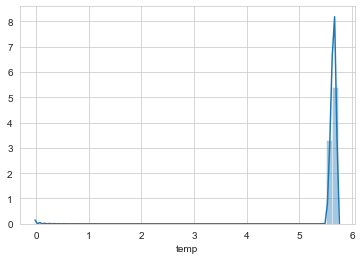

In [50]:
sb.distplot(np.log(train['temp']+1))

In [51]:
def rm_IQR_outliers(df, var):
    q1 = df[var].quantile(.25)
    q3 = df[var].quantile(.75)
    iqr = q3-q1
    h = 3*iqr # originally 1.5
    df.loc[df[var] > q3+h, var] = q3+h
    df.loc[df[var] < q1-h, var] = q1-h

In [52]:
rm_IQR_outliers(train, 'temp')

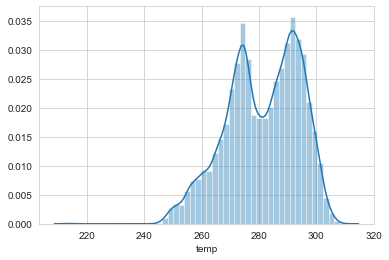

In [53]:
sb.distplot(train['temp'])

In [54]:
pd.crosstab(index = train["weather_main"], columns=train["weather_description"])

weather_description  SQUALLS  Sky is Clear  broken clouds  drizzle  \
weather_main                                                         
Clear                      0          1725              0        0   
Clouds                     0             0           4663        0   
Drizzle                    0             0              0      651   
Fog                        0             0              0        0   
Haze                       0             0              0        0   
Mist                       0             0              0        0   
Rain                       0             0              0        0   
Smoke                      0             0              0        0   
Snow                       0             0              0        0   
Squall                     4             0              0        0   
Thunderstorm               0             0              0        0   

weather_description  few clouds  fog  freezing rain  haze  \
weather_main                                                
Clear                         0    0              0     0   
Clouds                     1956    0              0     0   
Drizzle                       0    0              0     0   
Fog                           0  912              0     0   
Haze                          0    0              0  1360   
Mist                          0    0              0     0   
Rain                          0    0              2     0   
Smoke                         0    0              0     0   
Snow                          0    0              0     0   
Squall                        0    0              0     0   
Thunderstorm                  0    0              0     0   

weather_description  heavy intensity drizzle  heavy intensity rain  ...  \
weather_main                                                        ...   
Clear                                      0                     0  ...   
Clouds                                     0                     0  ...   
Drizzle                                   64                     0  ...   
Fog                                        0                     0  ...   
Haze                                       0                     0  ...   
Mist                                       0                     0  ...   
Rain                                       0                   467  ...   
Smoke                                      0                     0  ...   
Snow                                       0                     0  ...   
Squall                                     0                     0  ...   
Thunderstorm                               0                     0  ...   

weather_description  sleet  smoke  snow  thunderstorm  \
weather_main                                            
Clear                    0      0     0             0   
Clouds                   0      0     0             0   
Drizzle                  0      0     0             0   
Fog                      0      0     0             0   
Haze                     0      0     0             0   
Mist                     0      0     0             0   
Rain                     0      0     0             0   
Smoke                    0     20     0             0   
Snow                     3      0   293             0   
Squall                   0      0     0             0   
Thunderstorm             0      0     0           124   

weather_description  thunderstorm with drizzle  thunderstorm with heavy rain  \
weather_main                                                                   
Clear                                        0                             0   
Clouds                                       0                             0   
Drizzle                                      0                             0   
Fog                                          0                             0   
Haze                                         0                             0   
Mist             

In [55]:
train.head()

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description  traffic_volume  year  month  day  hour  
0    scattered clouds            5545  2012     10    2     9  
1       broken clouds            4516  2012     10    2    10  
2     overcast clouds            4767  2012     10    2    11  
3     overcast clouds            5026  2012     10    2    12  
4       broken clouds            4918  2012     10    2    13

In [56]:
train = train.drop(columns=['holiday', 'rain_1h', 'snow_1h', 'weather_main', 'day'])

In [57]:
train.head()

temp  clouds_all weather_description  traffic_volume  year  month  hour
0  288.28          40    scattered clouds            5545  2012     10     9
1  289.36          75       broken clouds            4516  2012     10    10
2  289.58          90     overcast clouds            4767  2012     10    11
3  290.13          90     overcast clouds            5026  2012     10    12
4  291.14          75       broken clouds            4918  2012     10    13

In [58]:
train.rename(columns={'weather_description':'weather'}, inplace=True)

In [59]:
cat_columns = ['weather', 'year', 'month', 'hour']
train = pd.get_dummies(train, prefix_sep="_",
                              columns=cat_columns)

In [60]:
train.head()

temp  clouds_all  traffic_volume  weather_SQUALLS  weather_Sky is Clear  \
0  288.28          40            5545                0                     0   
1  289.36          75            4516                0                     0   
2  289.58          90            4767                0                     0   
3  290.13          90            5026                0                     0   
4  291.14          75            4918                0                     0   

   weather_broken clouds  weather_drizzle  weather_few clouds  weather_fog  \
0                      0                0                   0            0   
1                      1                0                   0            0   
2                      0                0                   0            0   
3                      0                0                   0            0   
4                      1                0                   0            0   

   weather_freezing rain  ...  hour_14  hour_15  hour_16  hour_17  hour_18  \
0                      0  ...        0        0        0        0        0   
1                      0  ...        0        0        0        0        0   
2                      0  ...        0        0        0        0        0   
3                      0  ...        0        0        0        0        0   
4                      0  ...        0        0        0        0        0   

   hour_19  hour_20  hour_21  hour_22  hour_23  
0        0        0        0        0        0  
1        0        0        0        0        0  
2        0        0        0        0        0  
3        0        0        0        0        0  
4        0        0        0        0        0  

[5 rows x 84 columns]

In [61]:
train.shape

(48187, 84)

In [62]:
# Standardize
names = ['temp', 'clouds_all']
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(train[names])
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [63]:
scaled_df.head()

temp  clouds_all
0  0.551597   -0.240049
1  0.636328    0.657047
2  0.653588    1.041516
3  0.696739    1.041516
4  0.775978    0.657047

In [64]:
train.describe()

temp    clouds_all  traffic_volume  weather_SQUALLS  \
count  48187.000000  48187.000000    48187.000000     48187.000000   
mean     281.249243     49.365451     3259.618134         0.000083   
std       12.746312     39.015213     1986.954465         0.009111   
min      213.222000      0.000000        0.000000         0.000000   
25%      272.160000      1.000000     1192.500000         0.000000   
50%      282.450000     64.000000     3379.000000         0.000000   
75%      291.806000     90.000000     4933.000000         0.000000   
max      310.070000    100.000000     7280.000000         1.000000   

       weather_Sky is Clear  weather_broken clouds  weather_drizzle  \
count          48187.000000           48187.000000     48187.000000   
mean               0.035798               0.096769         0.013510   
std                0.185788               0.295646         0.115445   
min                0.000000               0.000000         0.000000   
25%                0.000000               0.000000         0.000000   
50%                0.000000               0.000000         0.000000   
75%                0.000000               0.000000         0.000000   
max                1.000000               1.000000         1.000000   

       weather_few clouds   weather_fog  weather_freezing rain  ...  \
count        48187.000000  48187.000000           48187.000000  ...   
mean             0.040592      0.018926               0.000042  ...   
std              0.197345      0.136266               0.006442  ...   
min              0.000000      0.000000               0.000000  ...   
25%              0.000000      0.000000               0.000000  ...   
50%              0.000000      0.000000               0.000000  ...   
75%              0.000000      0.000000               0.000000  ...   
max              1.000000      1.000000               1.000000  ...   

            hour_14       hour_15       hour_16       hour_17       hour_18  \
count  48187.000000  48187.000000  48187.000000  48187.000000  48187.000000   
mean       0.040862      0.040115      0.041256      0.040115      0.041152   
std        0.197972      0.196230      0.198884      0.196230      0.198644   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            hour_19       hour_20       hour_21       hour_22       hour_23  
count  48187.000000  48187.000000  48187.000000  48187.000000  48187.000000  
mean       0.040613      0.041069      0.041131      0.041380      0.042335  
std        0.197393      0.198452      0.198596      0.199171      0.201355  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000      0.000000      0.000000  
max        1.000000      1.000000      1.000000      1.000000      1.000000  

[8 rows x 84 columns]

In [65]:
train.head()

temp  clouds_all  traffic_volume  weather_SQUALLS  weather_Sky is Clear  \
0  288.28          40            5545                0                     0   
1  289.36          75            4516                0                     0   
2  289.58          90            4767                0                     0   
3  290.13          90            5026                0                     0   
4  291.14          75            4918                0                     0   

   weather_broken clouds  weather_drizzle  weather_few clouds  weather_fog  \
0                      0                0                   0            0   
1                      1                0                   0            0   
2                      0                0                   0            0   
3                      0                0                   0            0   
4                      1                0                   0            0   

   weather_freezing rain  ...  hour_14  hour_15  hour_16  hour_17  hour_18  \
0                      0  ...        0        0        0        0        0   
1                      0  ...        0        0        0        0        0   
2                      0  ...        0        0        0        0        0   
3                      0  ...        0        0        0        0        0   
4                      0  ...        0        0        0        0        0   

   hour_19  hour_20  hour_21  hour_22  hour_23  
0        0        0        0        0        0  
1        0        0        0        0        0  
2        0        0        0        0        0  
3        0        0        0        0        0  
4        0        0        0        0        0  

[5 rows x 84 columns]

In [66]:
train = train.drop(columns=['temp', 'clouds_all'])

In [67]:
resultado = pd.concat([train, scaled_df], axis = 1)

In [68]:
resultado.head()

traffic_volume  weather_SQUALLS  weather_Sky is Clear  \
0          5545.0              0.0                   0.0   
1          4516.0              0.0                   0.0   
2          4767.0              0.0                   0.0   
3          5026.0              0.0                   0.0   
4          4918.0              0.0                   0.0   

   weather_broken clouds  weather_drizzle  weather_few clouds  weather_fog  \
0                    0.0              0.0                 0.0          0.0   
1                    1.0              0.0                 0.0          0.0   
2                    0.0              0.0                 0.0          0.0   
3                    0.0              0.0                 0.0          0.0   
4                    1.0              0.0                 0.0          0.0   

   weather_freezing rain  weather_haze  weather_heavy intensity drizzle  ...  \
0                    0.0           0.0                              0.0  ...   
1                    0.0           0.0                              0.0  ...   
2                    0.0           0.0                              0.0  ...   
3                    0.0           0.0                              0.0  ...   
4                    0.0           0.0                              0.0  ...   

   hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  hour_23  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

       temp  clouds_all  
0  0.551597   -0.240049  
1  0.636328    0.657047  
2  0.653588    1.041516  
3  0.696739    1.041516  
4  0.775978    0.657047  

[5 rows x 84 columns]

In [69]:
y = train['traffic_volume']
X = train.loc[:, train.columns != 'traffic_volume']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [71]:
lm = LinearRegression()

In [72]:
lm.fit(X_train,y_train)

LinearRegression()

In [73]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 5.40565040e+15  5.40565040e+15  5.40565040e+15  5.40565040e+15
  5.40565040e+15  5.40565040e+15  5.40565040e+15  5.40565040e+15
  5.40565040e+15  5.40565040e+15  5.40565040e+15  5.40565040e+15
  5.40565040e+15  5.40565040e+15  5.40565040e+15  5.40565040e+15
  5.40565040e+15  5.40565040e+15  5.40565040e+15  5.40565040e+15
  5.40565040e+15  5.40565040e+15  5.40565040e+15  5.40565040e+15
  5.40565040e+15  5.40565040e+15  5.40565040e+15  5.40565040e+15
  5.40565040e+15  5.40565040e+15  5.40565040e+15  5.40565040e+15
  5.40565040e+15  5.40565040e+15  5.40565040e+15  5.40565040e+15
  5.40565040e+15  5.40565040e+15  1.75742886e+15  1.75742886e+15
  1.75742886e+15  1.75742886e+15  1.75742886e+15  1.75742886e+15
  1.75742886e+15 -2.00628688e+16 -2.00628688e+16 -2.00628688e+16
 -2.00628688e+16 -2.00628688e+16 -2.00628688e+16 -2.00628688e+16
 -2.00628688e+16 -2.00628688e+16 -2.00628688e+16 -2.00628688e+16
 -2.00628688e+16  1.55467931e+16  1.55467931e+16  1.55467931e+16
  1.55467

In [74]:
X_train.shape

(36140, 81)

In [75]:
y_pred = lm.predict(X_test)

In [76]:
r2_score(y_test, y_pred)

0.7829966064468084

# Ridge

In [77]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.4f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.4f}".format(ridge.score(X_test, y_test)))

Training set score: 0.7784
Test set score: 0.7830


In [78]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.4f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.4f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.7783
Test set score: 0.7829


In [79]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.4f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.4f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.7784
Test set score: 0.7830


# Lasso

In [80]:
#lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("Training set score: {:.4f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.4f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.7784
Test set score: 0.7830
Number of features used: 81


### Create quadratic and cubic features

In [81]:
quadratic = PolynomialFeatures(degree=2)
#cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X_train)
#X_cubic = cubic.fit_transform(X_train)

In [82]:
lm_cuad = lm.fit(X_quad, y_train)
y_quad_fit = lm_cuad.predict(quadratic.fit_transform(X_test))
quadratic_r2 = r2_score(y_test, y_quad_fit) #lm.predict(X_quad))
print(quadratic_r2)

-1.2898820014510873e+21
